<ipython-input-1-753dc9122d42>:55: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


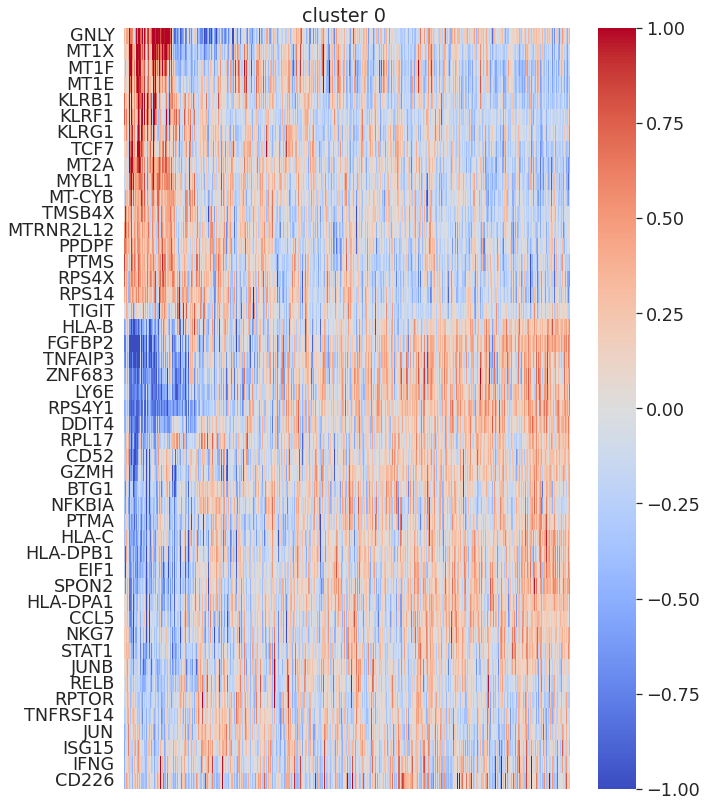

In [1]:
import scanpy as sc
sc.settings.verbosity = 2

import pandas as pd

import tqdm.notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy import array
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

from scipy.stats import zscore, ttest_ind

# import torch
# import pyro
import random 
##function to generate random colors for coloring clusters
def random_colors(n): #n is the number of colors you need to generate
    color_set = np.zeros((n,3))
    for i in range(n):
        r = random.uniform(0, 1)
        b = random.uniform(0, 1)
        g = random.uniform(0, 1)
        color_set[i] = [r,b,g]
    return color_set


META_FILE = 'metadata_dli.csv'
DATA_FILE = 'log_norm_data.csv'

data_df = pd.read_pickle(DATA_FILE)
DECIPHER_FILE = 'decipher_T_trajectory.csv'
# FILE_T = 'decipher_cd8_150_Z10.pkl'
umap_ = pd.read_csv(META_FILE, index_col = 0)

decipher = pd.read_csv(DECIPHER_FILE, index_col = 0)
decipher_v = decipher[['x','y']]
decipher_z = decipher.iloc[:,2:]




top_genes = ['GNLY','MT1X','MT1F', 'MT1E', 'KLRB1', 'KLRF1', 'KLRG1', 'TCF7', 'MT2A','MYBL1',
             'MT-CYB','TMSB4X','MTRNR2L12', 'PPDPF', 'PTMS',
             'RPS4X', 'RPS14','TIGIT', 'HLA-B', 'FGFBP2','TNFAIP3', 
             'ZNF683', 'LY6E', 'RPS4Y1', 'DDIT4', 'RPL17', 'CD52', 'GZMH',
             'BTG1', 'NFKBIA', 'PTMA', 'HLA-C', 'HLA-DPB1', 'EIF1', 'SPON2', 'HLA-DPA1',
            'CCL5', 'NKG7', 'STAT1', 'JUNB', 'RELB', 'RPTOR','TNFRSF14', 'JUN', 
             'ISG15', 'IFNG', 'CD226']

from collections import OrderedDict
from scipy.ndimage.filters import gaussian_filter

aml = umap_[umap_['DATA']=='AML']
cluster0 = aml.loc[aml['cluster_number']==0]
# cluster0 = cluster0.loc[cells]
cluster0 = cluster0.sort_values(by = 'response_group')
cluster0_data = data_df.loc[cluster0.index]
data = cluster0_data[top_genes]

label_dict = OrderedDict()
label_dict['AML_NR_POST'] = -2
label_dict['AML_NR_PRE'] = -1
label_dict['AML_R_PRE'] = 1
label_dict['AML_R_POST'] = 2

cluster0['label_val'] = np.repeat(0,len(cluster0))
for cell in cluster0.index:
    RT = cluster0.loc[cell,'response_group']
    val = label_dict[RT]
    cluster0.loc[cell,'label_val'] = val
cluster0 = cluster0.sort_values(by = 'label_val')   


cluster_z = pd.DataFrame()
for gene in data.columns:
    cluster_z[gene] = zscore(data[gene])
cluster_z.index = data.index

cluster_z['decipher'] = decipher_z.loc[cluster_z.index,8]*-1
cluster_z['label_val'] = cluster0['label_val']
sorted_c0 = cluster_z.sort_values(by = ['label_val','decipher'])
sorted_c0 = sorted_c0.drop(columns =[ 'label_val','decipher'])
smooth = pd.DataFrame(gaussian_filter(sorted_c0.transpose(), sigma=1), index = sorted_c0.columns, columns = sorted_c0.index )
# smooth
plt.figure(figsize = (10,14))
sns.set(font_scale = 1.6)
sns.heatmap(smooth,cmap = 'coolwarm', vmin = -1, vmax = 1, xticklabels = False, yticklabels = True)
plt.title('cluster 0 ')
# plt.savefig('cluster0_updated_heatmapRNR_smoothed_sortedbyZ8_fixed.eps', format= 'eps')
plt.show()